In [1]:
import os
import dask.dataframe as dd
import graphviz
os.chdir("/home/admin123/Activity_Description/AR_data")
fp = "Phones_accelerometer.csv"
df = dd.read_csv(fp)

In [2]:
df.columns

Index([u'Index', u'Arrival_Time', u'Creation_Time', u'x', u'y', u'z', u'User',
       u'Model', u'Device', u'gt'],
      dtype='object')

In [3]:
df.dtypes

Index              int64
Arrival_Time       int64
Creation_Time      int64
x                float64
y                float64
z                float64
User              object
Model             object
Device            object
gt                object
dtype: object

In [4]:
df.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [14]:
len(df.index)

13062475

## Note: Convert creation time from unix timestamp to date time

In [7]:
%%time
import datetime
import numpy as np
df["Creation_Time"] = df["Creation_Time"].astype("datetime64")

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 17.8 ms


/home/admin123/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:3714: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


##  Note: Extract date, hour and minute from the time stamp for group by aggregation

In [8]:
df["date"] = df["Creation_Time"].dt.date

In [9]:
df["date"].head()

0    2015-02-23
1    2015-02-23
2    2015-02-23
3    2015-02-23
4    2015-02-23
Name: date, dtype: object

In [10]:
df["hour"] = df["Creation_Time"].dt.hour

In [11]:
df["minute"] = df["Creation_Time"].dt.minute

In [12]:
df.columns

Index([u'Index', u'Arrival_Time', u'Creation_Time', u'x', u'y', u'z', u'User',
       u'Model', u'Device', u'gt', u'date', u'hour', u'minute'],
      dtype='object')

In [13]:
#dfs = df.set_index(["User","date", "hour", "minute"])


In [15]:
%%time
dfgb = df.groupby(["User","Model", "Device", "gt","date", "hour", "minute" ]).mean().compute()

CPU times: user 1min 12s, sys: 24.9 s, total: 1min 37s
Wall time: 37.8 s


In [11]:
len(dfgb.index)

2639

In [12]:
#dfgb.reset_index()
dfgb.head(20)

Arrival_Time  \
User Model  Device   gt         date       hour minute                 
a    nexus4 nexus4_1 bike       2015-02-23 13   30      1.424698e+12   
                                                31      1.424698e+12   
                                                32      1.424698e+12   
                                                33      1.424698e+12   
                                                34      1.424698e+12   
                                                35      1.424699e+12   
                     sit        2015-02-23 13   9       1.424697e+12   
                                                10      1.424697e+12   
                                                11      1.424697e+12   
                                                12      1.424697e+12   
                                                13      1.424697e+12   
                                                14      1.424697e+12   
                     stairsdown 2015-02-23 13   21      1.424698e+12   
                                                22      1.424698e+12   
                                                23      1.424698e+12   
                                                24      1.424698e+12   
                                                25      1.424698e+12   
                                                26      1.424698e+12   
                                                27      1.424698e+12   
                                                28      1.424698e+12   

                                                        Creation_Time  \
User Model  Device   gt         date       hour minute                  
a    nexus4 nexus4_1 bike       2015-02-23 13   30                NaN   
                                                31                NaN   
                                                32                NaN   
                                                33                NaN   
                                                34                NaN   
                                                35                NaN   
                     sit        2015-02-23 13   9                 NaN   
                                                10                NaN   
                                                11                NaN   
                                                12                NaN   
                                                13                NaN   
                                                14                NaN   
                     stairsdown 2015-02-23 13   21                NaN   
                                                22                NaN   
                                                23                NaN   
                                                24                NaN   
                                                25                NaN   
                                                26                NaN   
                                                27                NaN   
                                                28                NaN   

                                                                Index  \
User Model  Device   gt         date       hour minute                  
a    nexus4 nexus4_1 bike       2015-02-23 13   30      290092.000000   
                                                31      297413.500000   
                                                32      305203.500000   
                                                33      311814.000000   
                                                34      318346.000000   
                                                35      322752.000000   
                     sit        2015-02-23 13   9        60954.500000   
                                                10       72008.500000   
                                                11       83893.000000   
                                                12       9580

## Note: Aggregation by mean on the time stamp attributes and index, does not make sense, so we will just drop these

In [13]:
req_cols = ["x", "y", "z"]
dfgb = dfgb[req_cols]
dfgb.head()

x         y         z
User Model  Device   gt   date       hour minute                              
a    nexus4 nexus4_1 bike 2015-02-23 13   30     -4.895992  0.420529  8.745772
                                          31     -4.771115  0.227741  8.895711
                                          32     -4.722528  0.265253  8.917659
                                          33     -4.900786  0.087041  8.845624
                                          34     -4.793545  0.162035  8.903905

In [14]:
import seaborn as sns
dfgb = dfgb.reset_index()

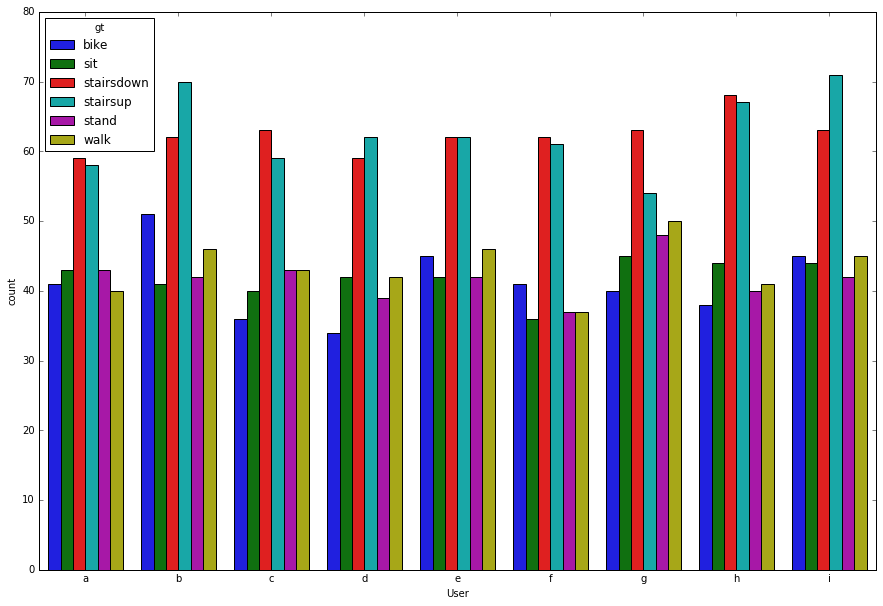

In [15]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
f, ax = plt.subplots(1, 1, figsize = (15, 10))
sns.countplot(x = "User", hue = "gt", data = dfgb)

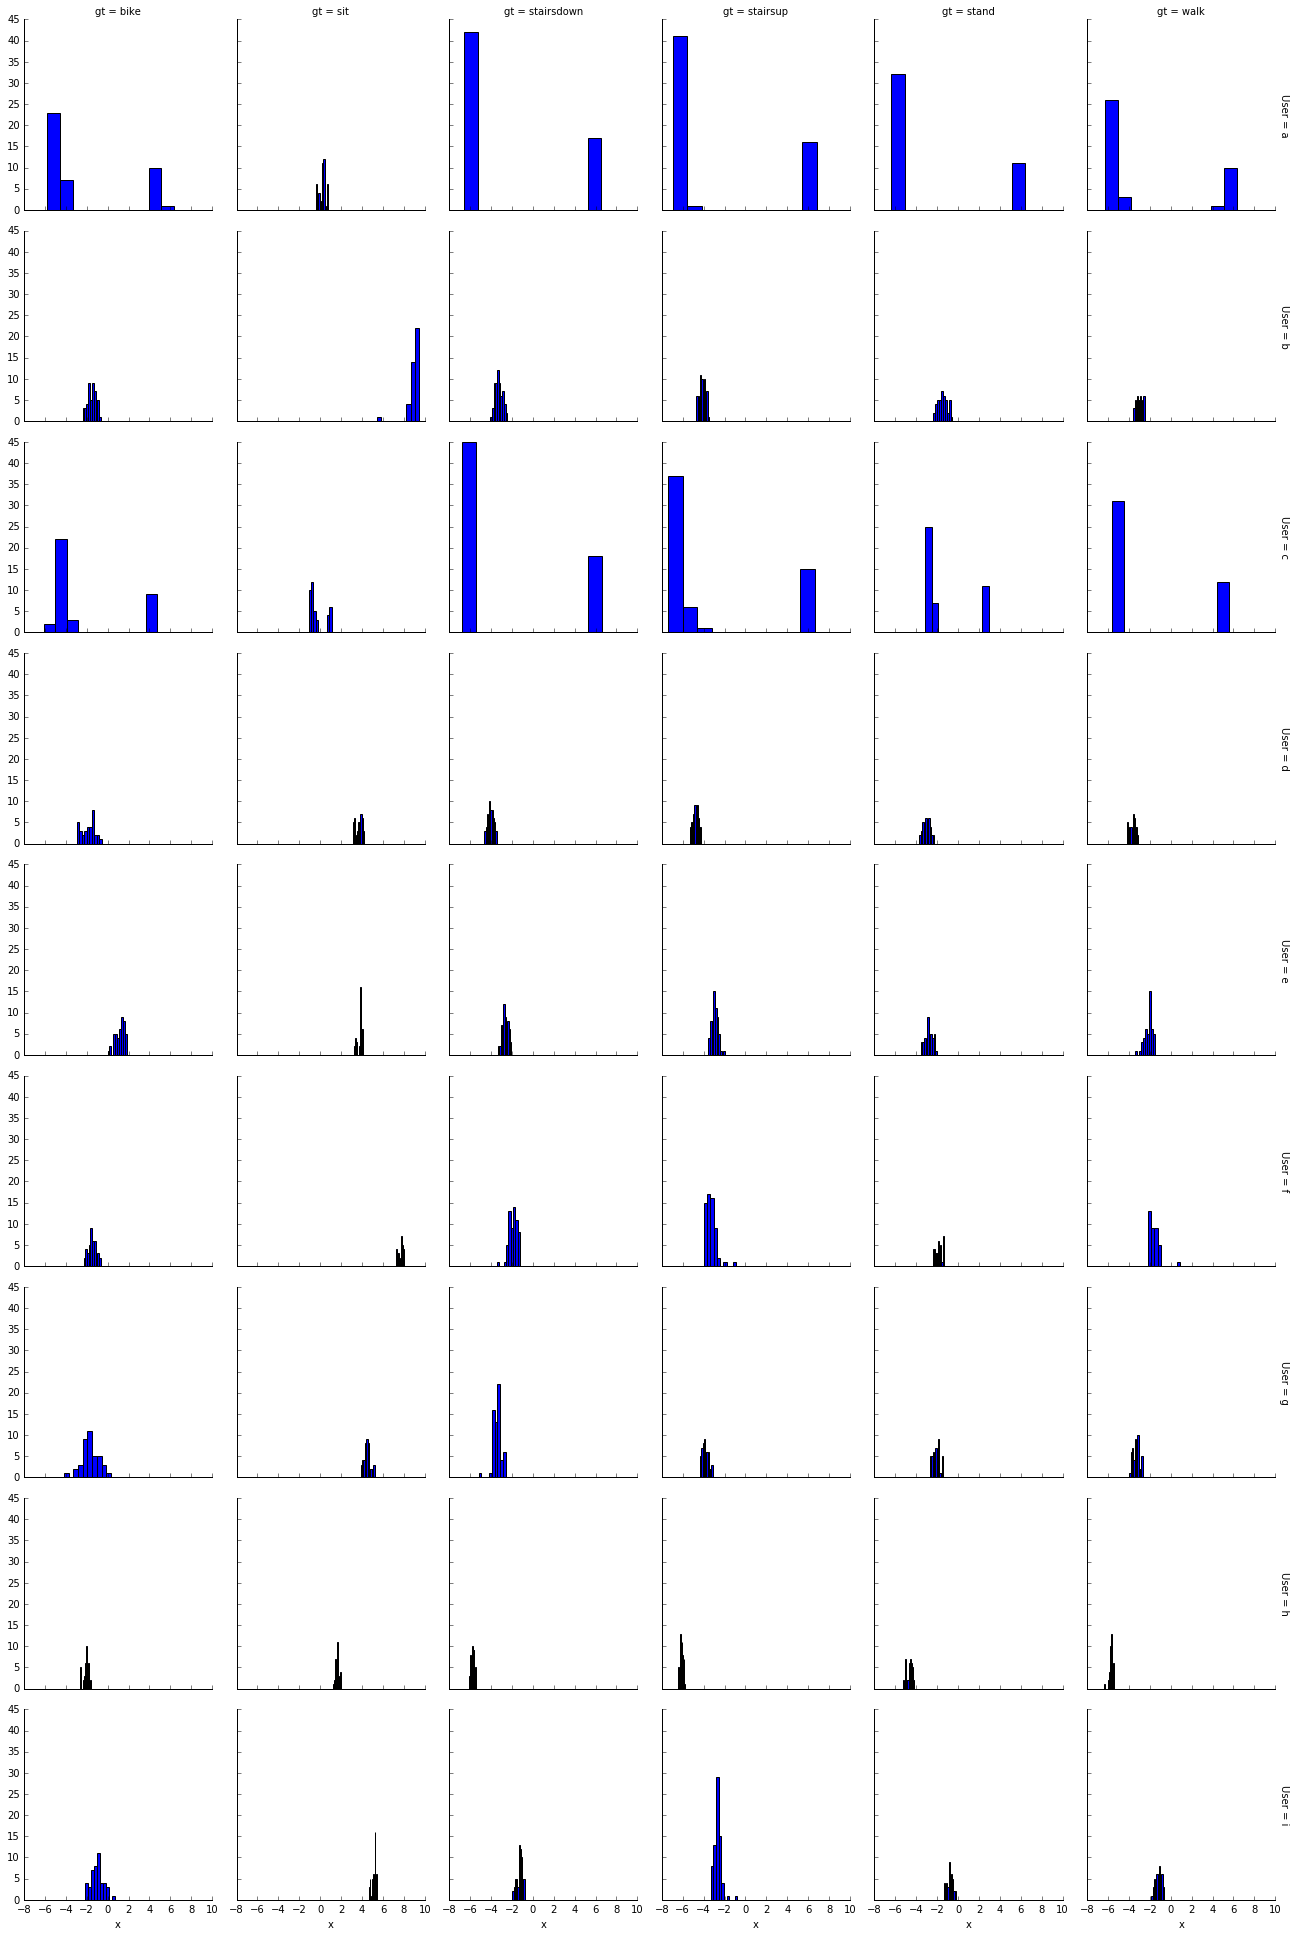

In [16]:


grid = sns.FacetGrid(dfgb, row="User", col="gt", margin_titles=True)
grid.map(plt.hist, "x")

## Note : Delete the dataframe, we will use only the summarized results for further analysis. This is for reclaiming the memory

In [ ]:
del df

In [18]:
dfgb.ccolumns = dfgb.columns.get_level_values(0)

In [19]:
dfgb.head()

,User,Model,Device,gt,date,hour,minute,x,y,z
0,a,nexus4,nexus4_1,bike,2015-02-23,13,30,-4.895992,0.420529,8.745772
1,a,nexus4,nexus4_1,bike,2015-02-23,13,31,-4.771115,0.227741,8.895711
2,a,nexus4,nexus4_1,bike,2015-02-23,13,32,-4.722528,0.265253,8.917659
3,a,nexus4,nexus4_1,bike,2015-02-23,13,33,-4.900786,0.087041,8.845624
4,a,nexus4,nexus4_1,bike,2015-02-23,13,34,-4.793545,0.162035,8.903905


In [25]:
pred_cols = ["User", "Model", "hour", "minute", "x", "y", "z"]
label = ["gt"]
dfpred = dfgb[pred_cols]


In [26]:
dfpred.dtypes

User       object
Model      object
hour        int64
minute      int64
x         float64
y         float64
z         float64
dtype: object

In [31]:
dfpred["hour"] = dfpred["hour"].astype("str")

/home/admin123/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
import pandas as pd
dfpred = pd.get_dummies(dfpred)

In [38]:
dfpp = dfpred

In [40]:
dfpp["gt"] = dfgb["gt"]

In [41]:
dfpp.dtypes

minute                int64
x                   float64
y                   float64
z                   float64
User_a                uint8
User_b                uint8
User_c                uint8
User_d                uint8
User_e                uint8
User_f                uint8
User_g                uint8
User_h                uint8
User_i                uint8
Model_nexus4          uint8
Model_s3              uint8
Model_s3mini          uint8
Model_samsungold      uint8
hour_0                uint8
hour_1                uint8
hour_10               uint8
hour_11               uint8
hour_12               uint8
hour_13               uint8
hour_14               uint8
hour_15               uint8
hour_2                uint8
hour_21               uint8
hour_22               uint8
hour_23               uint8
hour_3                uint8
hour_4                uint8
hour_5                uint8
hour_6                uint8
hour_7                uint8
gt                   object
dtype: object

In [52]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(dfpp, test_size=0.2)

In [53]:
pred_cols = list(set(dfpp.columns) - set(["gt"]))

In [56]:
traindfX = traindf[pred_cols]
testdfX = testdf[pred_cols]
traindfY = traindf["gt"]
testdfY = testdf["gt"]

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [59]:
clf.fit(traindfX, traindfY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [60]:
predY = clf.predict(testdfX)

In [61]:
clf.score(testdfX, testdfY)

0.8257575757575758

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(traindfX, traindfY)
clf.score(testdfX, testdfY)

0.8314393939393939

In [67]:
clf.feature_importances_

array([0.00879149, 0.00426786, 0.00662177, 0.00163141, 0.00202165,
       0.00661752, 0.00411713, 0.00860816, 0.00809102, 0.00880286,
       0.00060113, 0.0012672 , 0.0019387 , 0.00846888, 0.01733131,
       0.01944089, 0.01171974, 0.00842297, 0.00573012, 0.01239499,
       0.01084085, 0.01484337, 0.00271217, 0.00287309, 0.08976583,
       0.0057873 , 0.00843987, 0.00768605, 0.15803974, 0.33714459,
       0.00666204, 0.19822185, 0.00487259, 0.00522387])

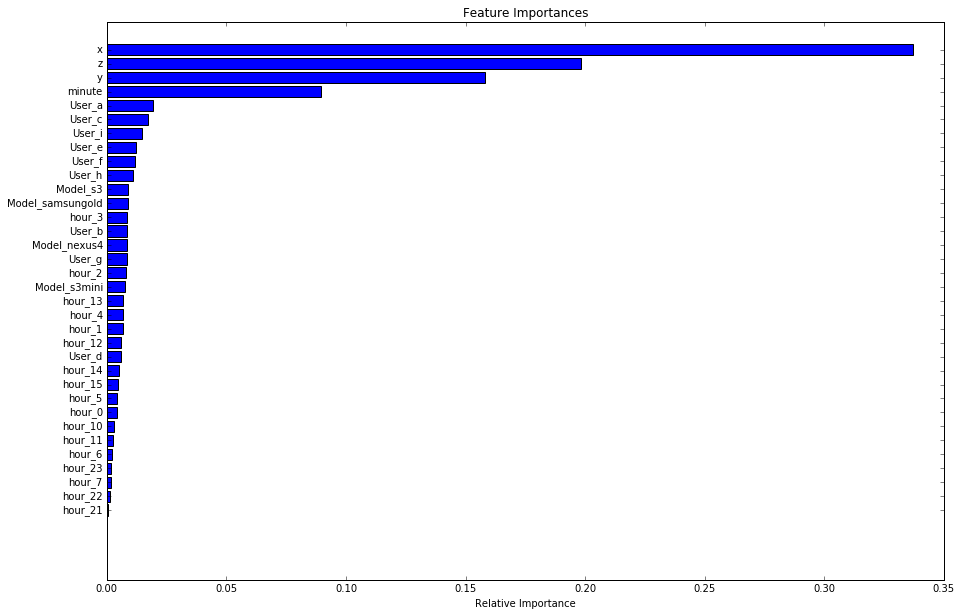

In [70]:
importances = clf.feature_importances_
indices = np.argsort(importances)
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [pred_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()